In [27]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [2]:
with open('holle/main_data/train_data.json', 'r') as holle_train:
    train_data = json.load(holle_train)

In [3]:
data_keys = train_data[0].keys()

data_keys

for key,val in train_data[0].items():
    print("Key: {} (Type: {})".format(key, type(val)))

Key: documents (Type: <class 'dict'>)
Key: movie_name (Type: <class 'str'>)
Key: spans (Type: <class 'list'>)
Key: labels (Type: <class 'list'>)
Key: imdb_id (Type: <class 'str'>)
Key: chat_id (Type: <class 'str'>)
Key: chat (Type: <class 'list'>)


In [4]:
train_document_keys = train_data[0]['documents'].keys()

train_document_keys

for key,val in train_data[0]['documents'].items():
    print("Key: {} (Type: {})".format(key, type(val)))

Key: plot (Type: <class 'str'>)
Key: review (Type: <class 'str'>)
Key: fact_table (Type: <class 'dict'>)
Key: comments (Type: <class 'list'>)


In [7]:
chat_document_information = []
for chat in train_data:
    
    documents = chat['documents']
    chat_info = dict()
    chat_info['plot_length']  = len(documents['plot'])
    chat_info['plot_word_count'] = len(documents['plot'].split(' '))
    chat_info['review_length'] = len(documents['review'])
    chat_info['review_word_count'] = len(documents['review'].split(' '))
    chat_info['num_comments'] = len(documents['comments'])
    chat_info['comment_lengths'] = [len(comment) for comment in documents['comments']]
    chat_info['comment_word_counts'] = [len(comment.split(" ")) for comment in documents['comments']]
    
    chat_document_information.append(chat_info)
    
chat_document_information[:10]

chat_summary_df = pd.DataFrame.from_dict(chat_document_information)

In [8]:
chat_summary_df

,plot_length,plot_word_count,review_length,review_word_count,num_comments,comment_lengths,comment_word_counts
0,1366,244,3303,566,15,"[86, 29, 40, 21, 32, 52, 121, 28, 62, 51, 2, 2...","[16, 6, 7, 5, 6, 12, 24, 6, 14, 10, 1, 1, 1, 1..."
1,1718,297,1639,294,10,"[70, 45, 17, 60, 30, 28, 40, 77, 42, 73]","[13, 10, 3, 12, 5, 6, 8, 13, 5, 12]"
2,1162,209,1601,255,24,"[131, 45, 31, 43, 249, 96, 39, 70, 64, 82, 43,...","[25, 6, 6, 6, 43, 18, 6, 12, 12, 10, 6, 7, 9, ..."
3,981,167,702,129,21,"[50, 38, 15, 528, 37, 108, 119, 144, 62, 43, 6...","[10, 6, 2, 92, 6, 19, 24, 27, 10, 7, 11, 12, 1..."
4,1180,213,1010,178,24,"[50, 56, 34, 50, 139, 23, 89, 40, 38, 99, 56, ...","[10, 9, 7, 9, 25, 4, 20, 6, 6, 20, 10, 7, 11, ..."
...,...,...,...,...,...,...,...
7223,1369,236,2181,384,33,"[38, 57, 12, 77, 62, 52, 124, 121, 50, 55, 120...","[8, 12, 2, 12, 11, 9, 21, 23, 7, 11, 23, 20, 1..."
7224,0,1,3309,567,47,"[39, 92, 95, 15, 89, 96, 78, 60, 75, 22, 86, 1...","[10, 14, 16, 3, 16, 19, 11, 6, 15, 4, 15, 21, ..."
7225,1063,217,2765,500,20,"[90, 4, 113, 36, 84, 48, 116, 135, 112, 111, 1...","[19, 1, 20, 5, 15, 8, 22, 25, 20, 20, 22, 38, ..."
7226,1324,246,2035,376,15,"[11, 39, 62, 75, 79, 283, 58, 60, 131, 33, 62,...","[1, 6, 10, 15, 12, 52, 11, 11, 24, 7, 10, 13, ..."


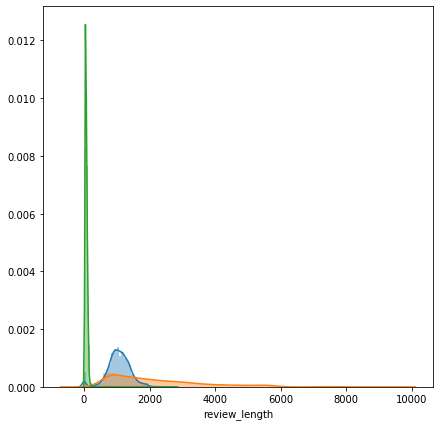

In [51]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
sns.distplot(chat_summary_df['plot_length'], ax=axes)
sns.distplot(chat_summary_df['review_length'], ax=axes)
sns.distplot(list(itertools.chain.from_iterable(chat_summary_df['comment_lengths'].values)))

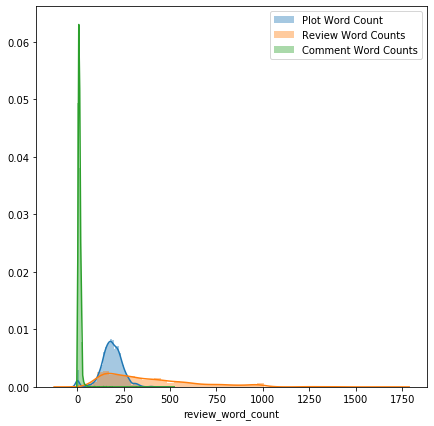

In [45]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
sns.distplot(chat_summary_df['plot_word_count'], label='Plot Word Count', ax=axes)
sns.distplot(chat_summary_df['review_word_count'], label='Review Word Counts', ax=axes)
sns.distplot(list(itertools.chain.from_iterable(chat_summary_df['comment_word_counts'].values)), 
             label='Comment Word Counts')
axes.legend()

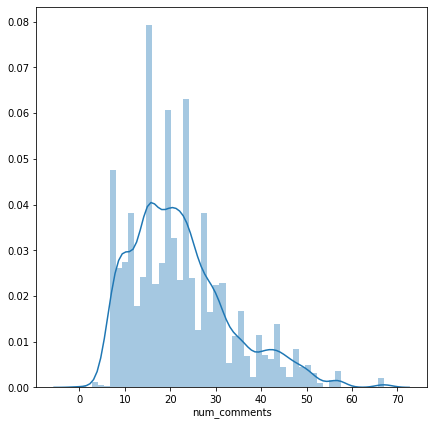

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
sns.distplot(chat_summary_df['num_comments'], 
             label='Number of Comments')